# Figure curve fitting analysis population model

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from brian2 import *
import os

## Creating random target data and computing the corresponding max error

In [4]:
def max_error_random(filename,carrier,ind,cdt='random'):
    path='./fig_param_space_pop/param_space_pop_data_files/'
    phase=load(path+filename)
    res_rand=np.zeros(5)
    if cdt=='mono':
        for i in range(5):
            res_rand[i]=np.random.uniform(0,180,1)
        res_rand_sort=np.sort(res_rand)
        res_rand=res_rand_sort
    else:
        for i in range(5):
            res_rand[i]=np.random.uniform(0,360,1)
            
    print(res_rand)
    nbr_param_sets=int(1.*phase.size/phase.shape[0])
    max_error_flat=np.zeros(nbr_param_sets)
    phase_flat=phase.reshape((5,nbr_param_sets))
    for i in range(nbr_param_sets):
        if sum(isnan(phase_flat[:,i]))!=0:
            max_error_flat[i]=nan
        else:
            max_error_flat[i]=amax(abs(phase_flat[:,i]-res_rand))
    
    max_error=max_error_flat.reshape((1,phase.shape[1],phase.shape[2],phase.shape[3],phase.shape[4],phase.shape[5]))
    save(path+'max_error_random_'+str(ind)+'.npy',max_error)
    
    return max_error.shape

In [5]:
def random_test(num_rep,cdt):
    seed(34032483)
    path='./fig_param_space_pop/param_space_pop_data_files/'
    cp=0
    b_err=np.zeros(num_rep)
    for i in range(num_rep): 
        max_error_random('phase_500.npy',500,i,cdt)    
        b_err[i]=nanmin(load(path+'max_error_random_'+str(i)+'.npy'))
        os.remove(path+'max_error_random_'+str(i)+'.npy')
        cp+=1
        print(100.0*cp/num_rep)
        print(b_err[i])
    save(path+'rand_err_1000_'+cdt+'.npy',b_err)

In [6]:
## Cell below can take a fairly long time, few hours. 
#The precomputed data can be found in the files 'rand_err_1000_random.npy' and 'rand_err_1000_mono.npy'

random_test(1000,'random')
random_test(1000,'mono')

[287.60271076 327.18456754 184.82478904 230.9796817  223.12742223]
0.1
63.35232778221268
[153.6049141    7.25545616 319.6287593  184.62803992 342.14284412]
0.2
153.74126181717108
[228.778004    54.71334611  98.42030881 331.74911376  70.10068767]
0.3
91.38181255814433
[135.82992823 181.83638858 207.73610418  48.73334671 159.50287725]
0.4
33.59019587217787
[287.65863942 279.49197977 210.82376846 331.307322   305.65674701]


KeyboardInterrupt: 

## The two cell belows can be run without running the cells above, it will use already computed data to plot the curve fitting analysis figure

In [7]:
path='./fig_param_space_pop/param_space_pop_data_files/'
res_err=load(path+'rand_err_1000_random.npy')
print('Percentage of fully random data leading to errors below 5 degrees: '+str(len(res_err[res_err<=5.0])) + '%')
res_mono=load(path+'rand_err_1000_mono.npy')
print('Percentage of random monotonic data (below 180 degrees) leading to errors below 5 degrees: ' + str(len(res_mono[res_mono<=5.0])*100.0/1000) +'%')

Percentage of fully random data leading to errors below 5 degrees: 0%
Percentage of random monotonic data (below 180 degrees) leading to errors below 5 degrees: 7.6%


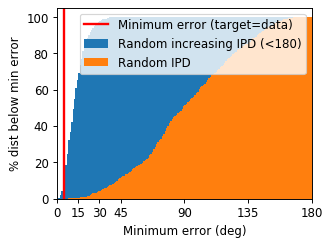

In [8]:
figure(figsize=(4, 3), dpi=85)
hist(res_mono, linspace(0, 180, 181), cumulative=True,weights=ones(len(res_mono))*100./len(res_mono),label='Random increasing IPD (<180)',lw=0)
hist(res_err, linspace(0, 180, 181), cumulative=True,weights=ones(len(res_err))*100./len(res_err),label='Random IPD',lw=0)
axvline(5, c='r', lw=2, label='Minimum error (target=data)')
#ylim(0, 100)
xlim(0, 180)
xticks([0,15,30,45,90,135,180])
legend(loc='upper right')
xlabel('Minimum error (deg)')
ylabel('% dist below min error')
tight_layout()
#savefig('fig_pop_model_curve_fitting_analysis.pdf')